# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [42]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [43]:
# YOUR ANSWER HERE
import scipy.io.wavfile as wav
filepath = '/Users/mihailkalinkin/Documents/ВШЭ/DSP/ЛАБЫ/resources/dsp1.wav'
fr, signal = wav.read(filepath)
print(f'Частота дискретизации: {fr} Герц')
print(f'Уровни квантования: {2 ** (8 * signal.dtype.itemsize)}')

Частота дискретизации: 44100 Герц
Уровни квантования: 65536


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

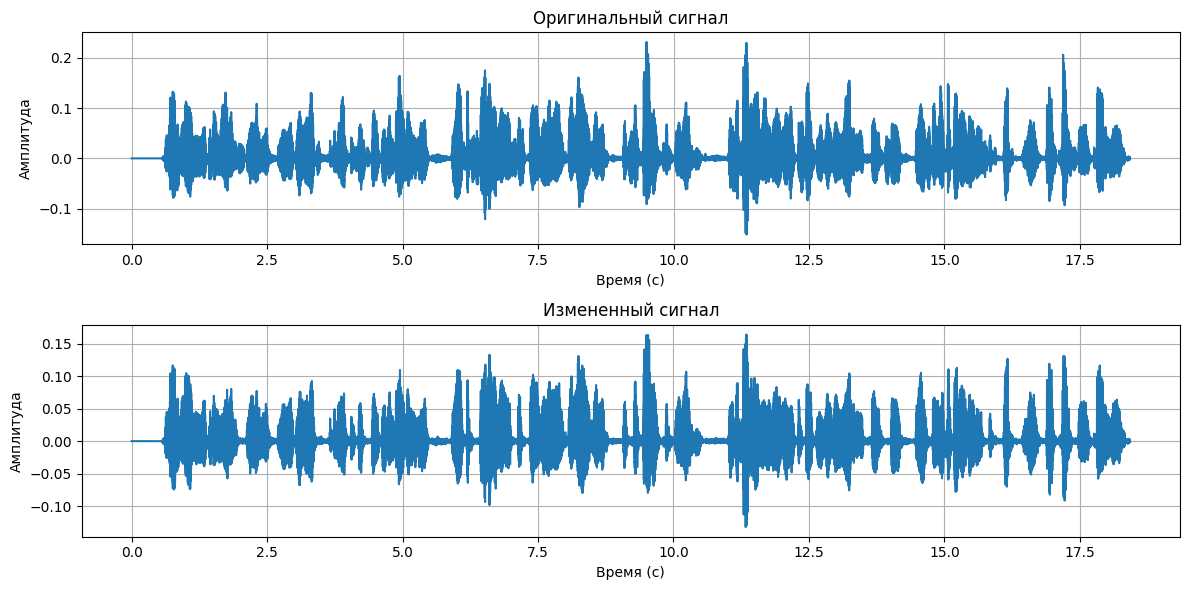

Оригинальное аудио:


Изменённое аудио:


In [44]:
# YOUR ANSWER HERE
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import numpy as np
file_path = '/Users/mihailkalinkin/Documents/ВШЭ/DSP/ЛАБЫ/resources/dsp1.wav'  
audio, sr = librosa.load(file_path, sr=None) 
new_sr = 3000  
audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=new_sr)  
original_time = np.linspace(0, len(audio) / sr, num=len(audio))
resampled_time = np.linspace(0, len(audio_resampled) / new_sr, num=len(audio_resampled))
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(original_time, audio)
plt.title('Оригинальный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(resampled_time, audio_resampled)
plt.title('Измененный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()
plt.show()
print("Оригинальное аудио:")
display(Audio(file_path))  
print("Изменённое аудио:")
display(Audio(audio_resampled, rate=new_sr))  


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

In [45]:
# YOUR ANSWER HERE
#Формат .wav является неразжатым и обеспечивает высокое качество звука, что делает его популярным в профессиональной записи. Формат .mp3 представляет собой сжатый аудиофайл с хорошим качеством и меньшими размерами, что делает его идеальным для музыки и подкастов. Формат .ogg также сжатый, предлагает хорошее качество  при немного большем размере и часто используется в веб-приложениях и играх, не имея лицензионных ограничений.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [46]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [47]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

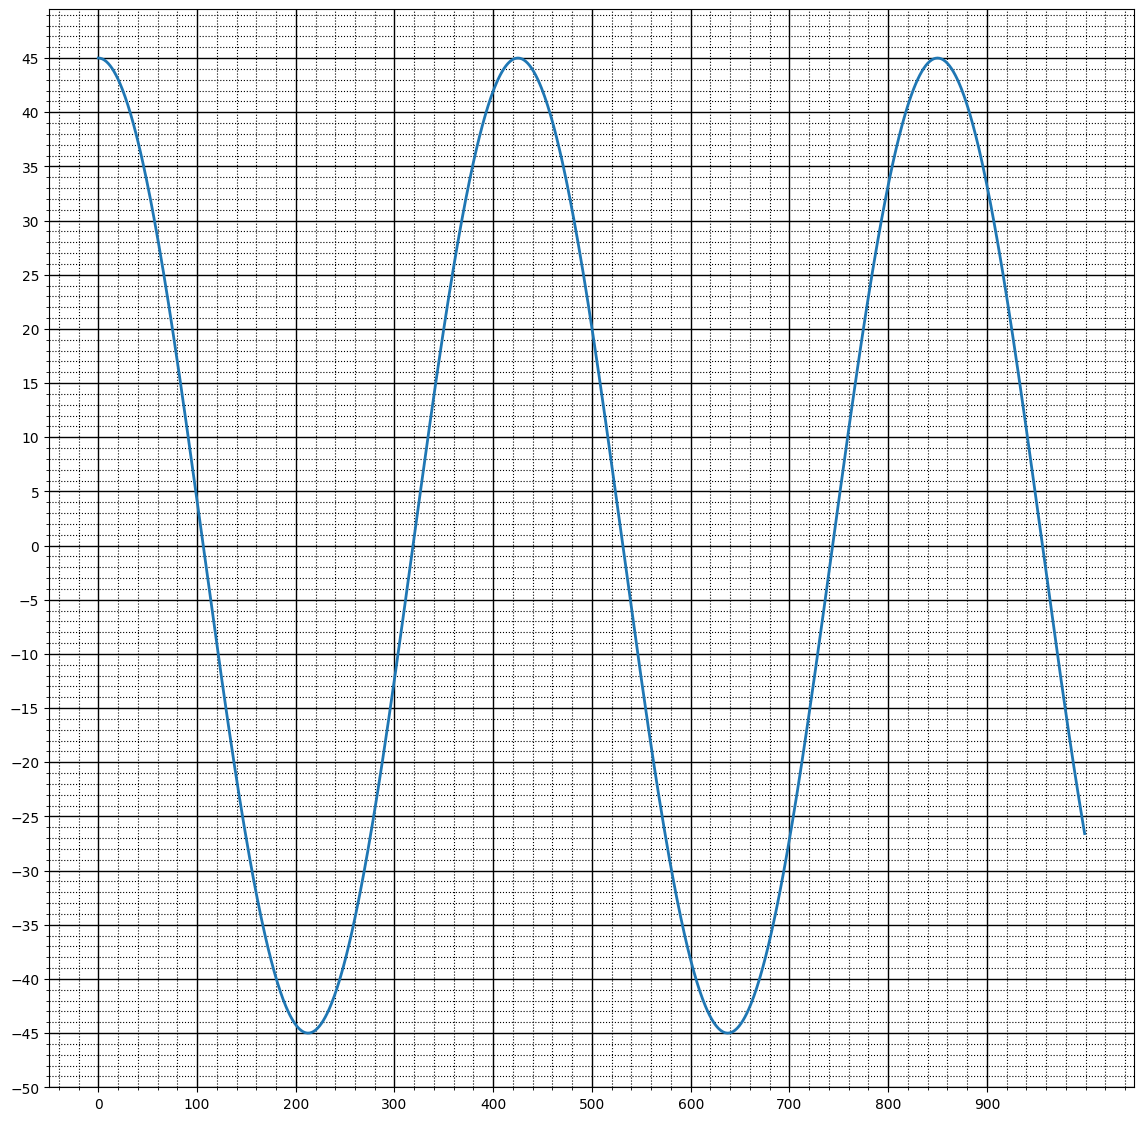

In [48]:
draw_signal(test_data['task2']['a'])

In [49]:
# YOUR CODE HERE
A_a = 45  
T_a = 425  
Ph_a = 0  
O_a = 2 * np.pi / T_a 
n_samples = 1000
t = np.arange(n_samples)
a = A_a * np.cos(O_a * t + Ph_a)

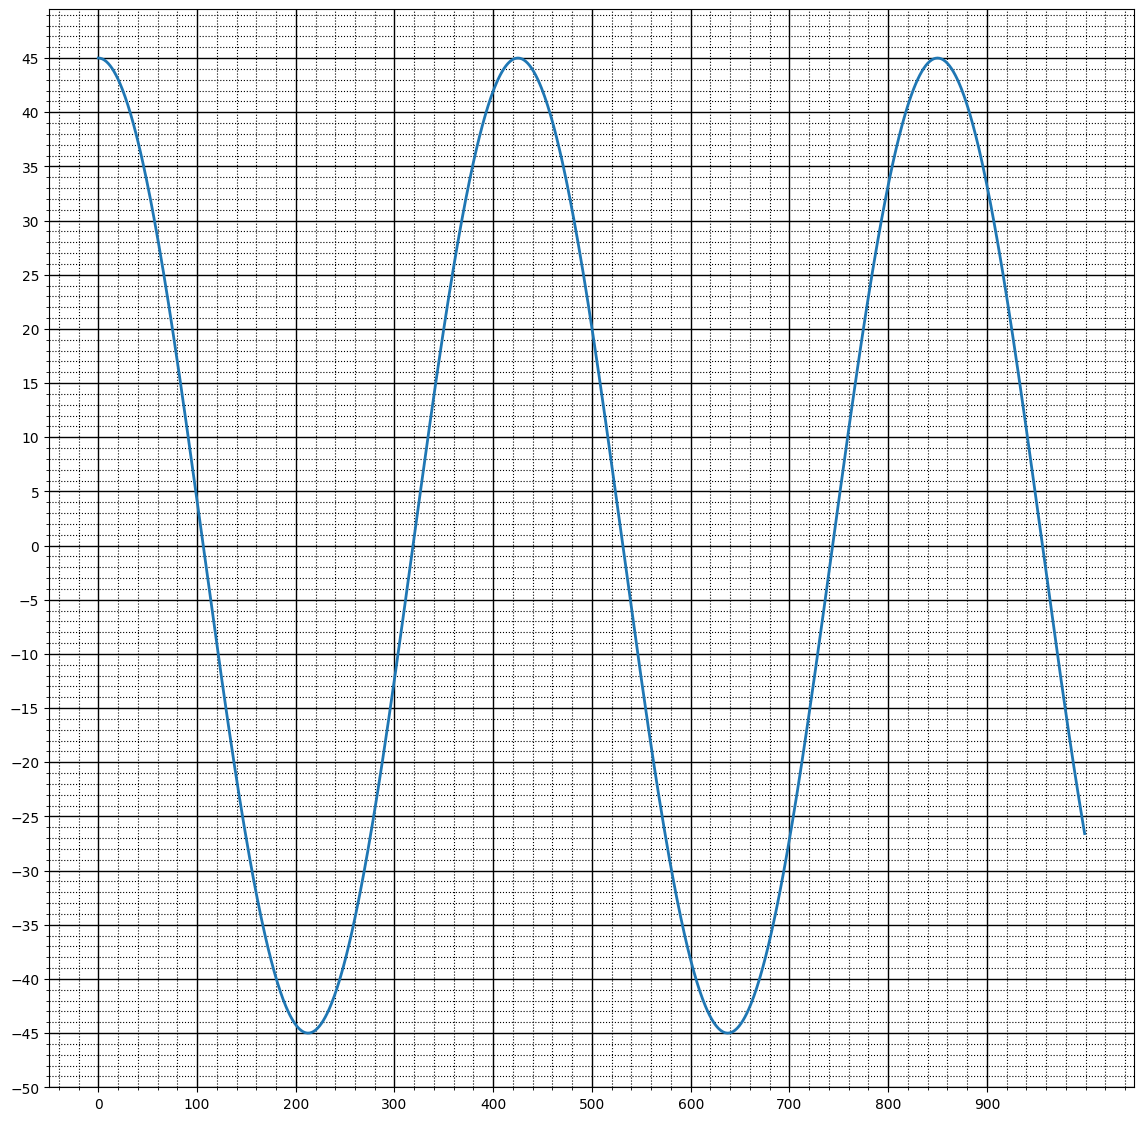

In [50]:
draw_signal(a)

In [51]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.015

3. Фаза - $\phi= $0

### Сигнал ***b***

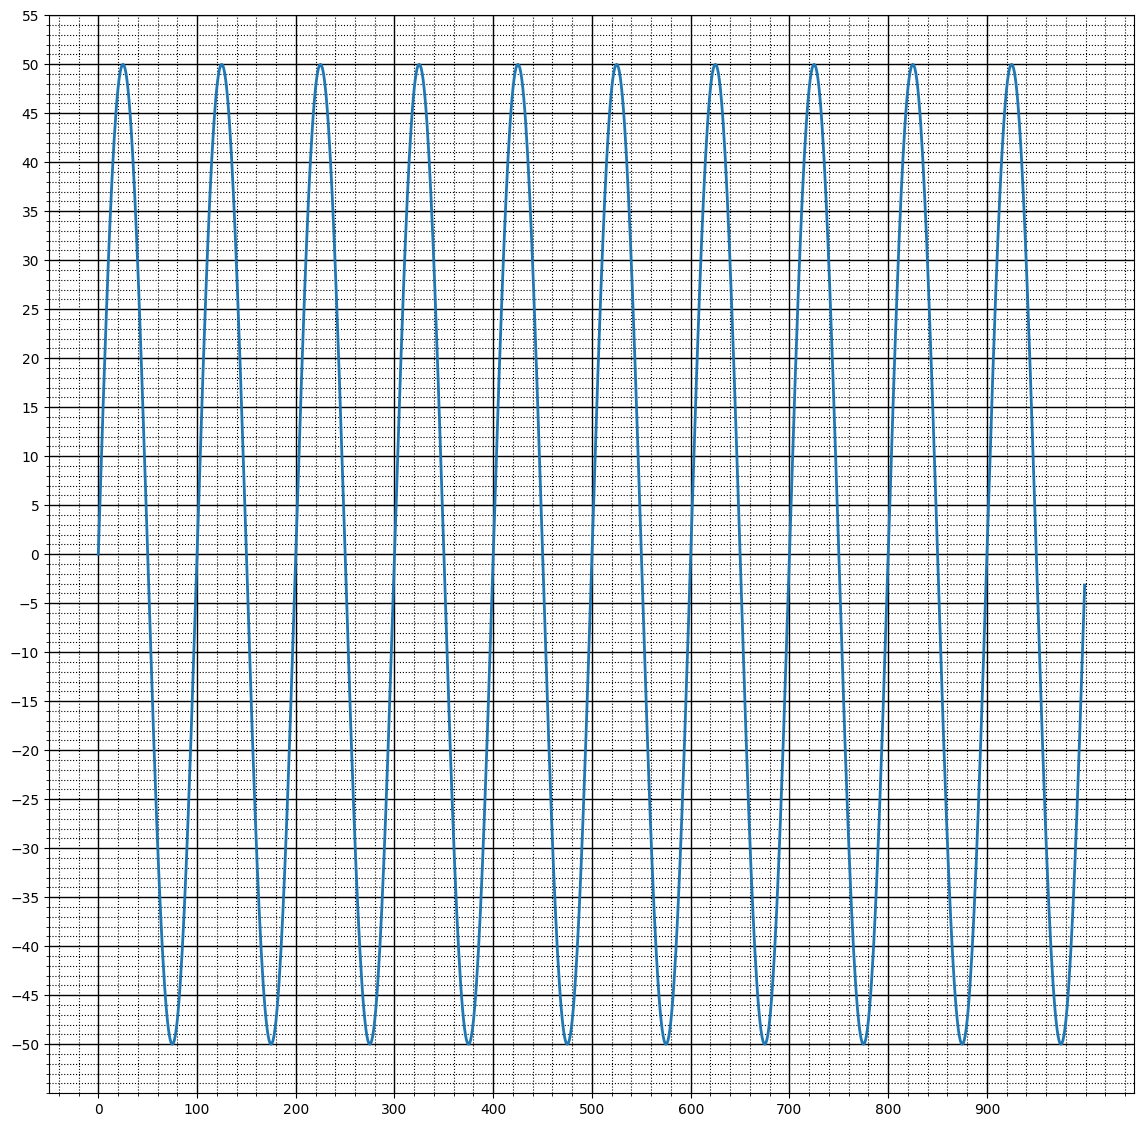

In [52]:
draw_signal(test_data['task2']['b'])

In [53]:
# YOUR CODE HERE
A_b = 50  
T_b = 100 
Ph_b = -np.pi / 2
O_b = 2 * np.pi / T_b 
n_samples = 1000
t = np.arange(n_samples)
b = A_b * np.cos(O_b * t + Ph_b)

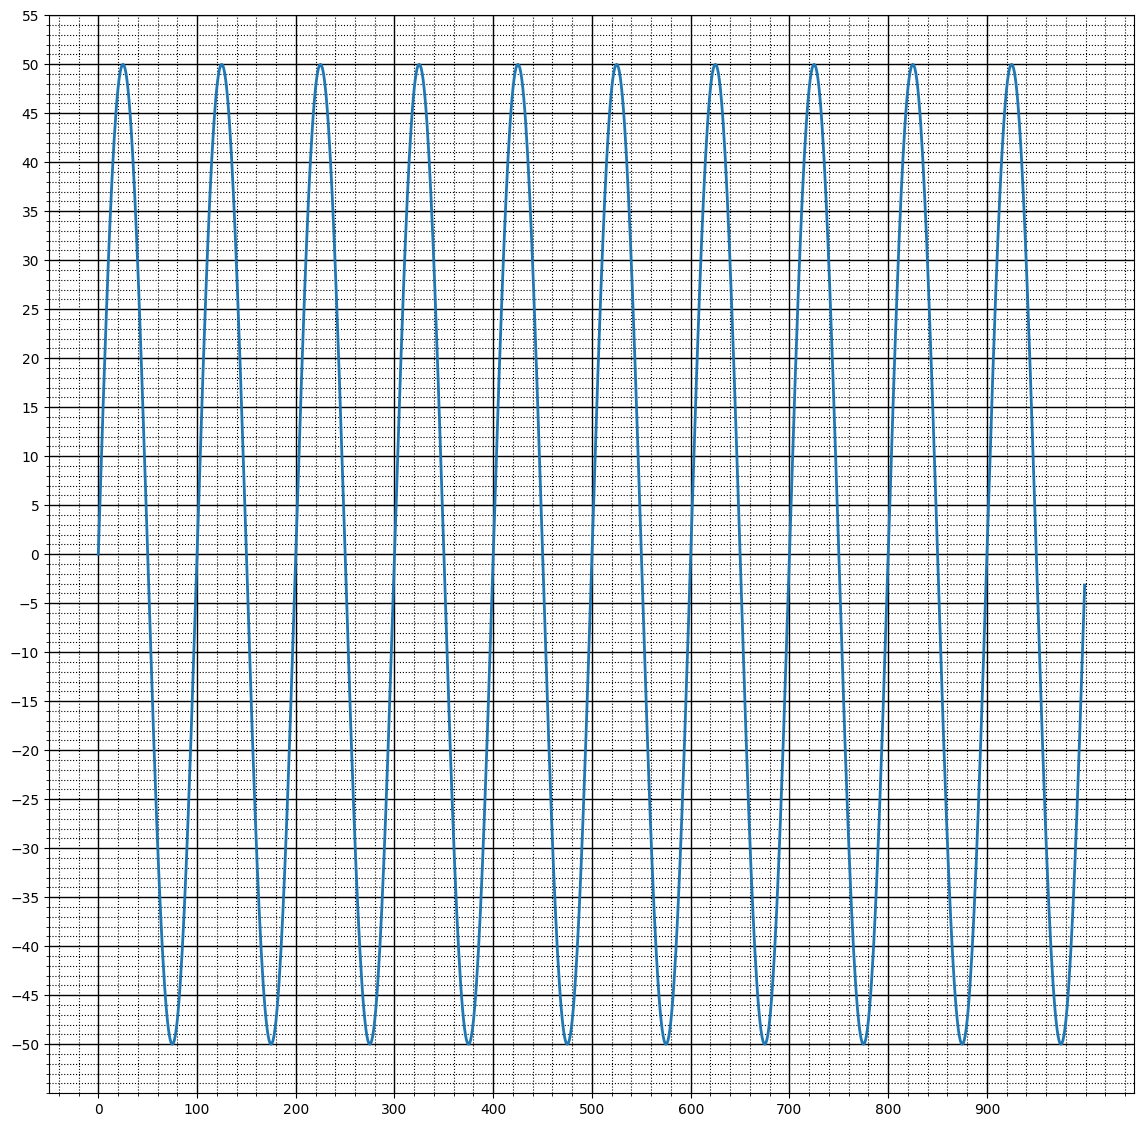

In [54]:
draw_signal(b)

In [55]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $50

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.063

3. Фаза - $\phi= -\frac{\pi}{2} $

### Сигнал ***c***

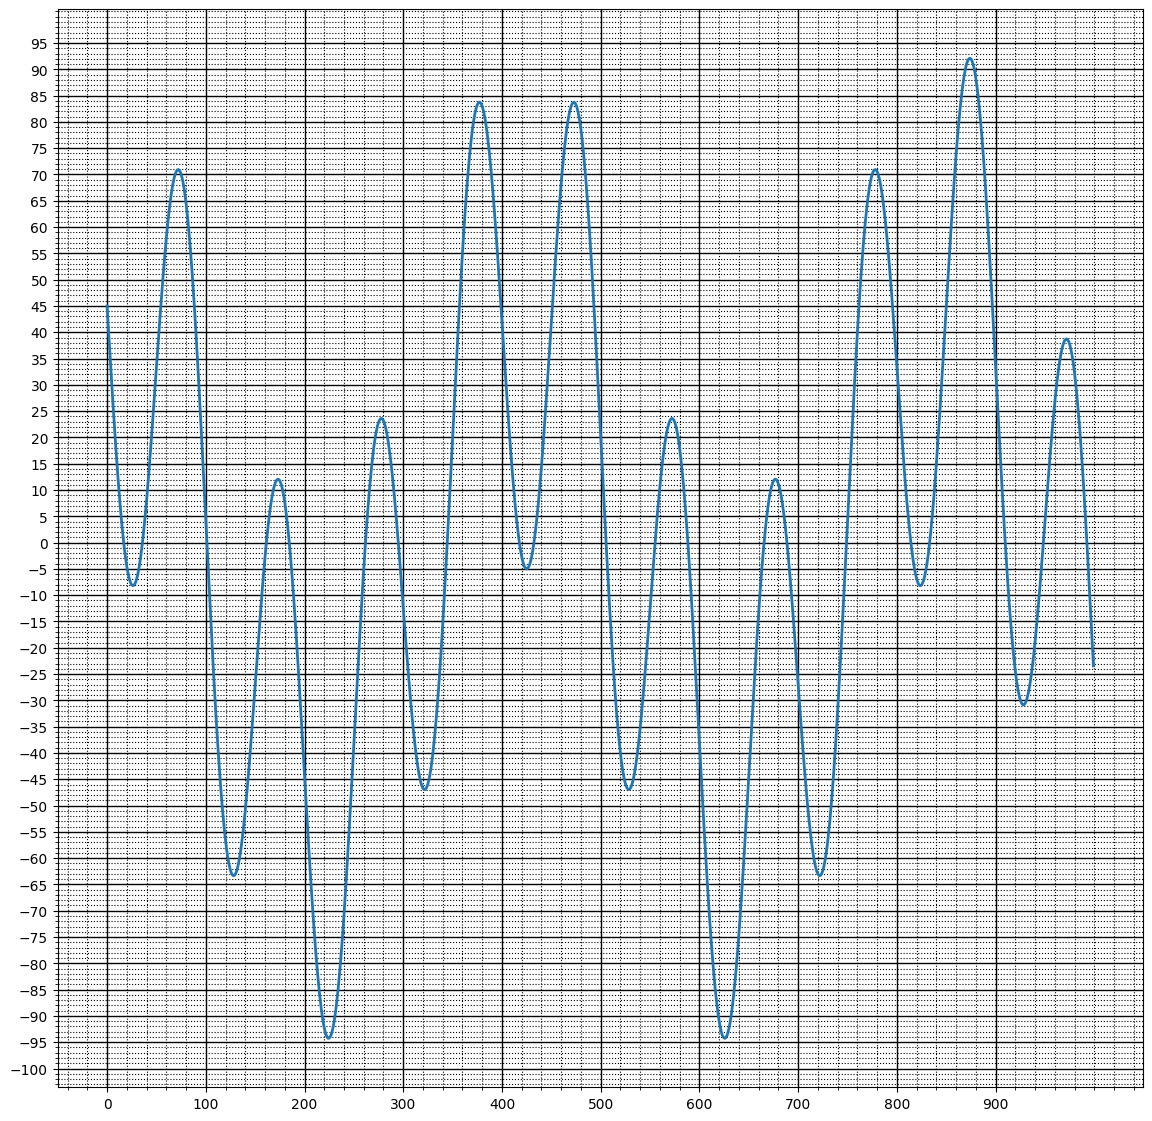

In [56]:
draw_signal(test_data['task2']['c'])

In [57]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
A1 = 45  
T1 = 425  
Ph1 = 0  
O1 = 2 * np.pi / T1  

A2 = 50  
T2 = 100  
Ph2 = np.pi/ 2  
O2 = 2 * np.pi / T2  
n_samples = 1000
t = np.arange(n_samples)

c = A1 * np.cos(O1 * t + Ph1) + A2 * np.cos(O2 * t + Ph2)

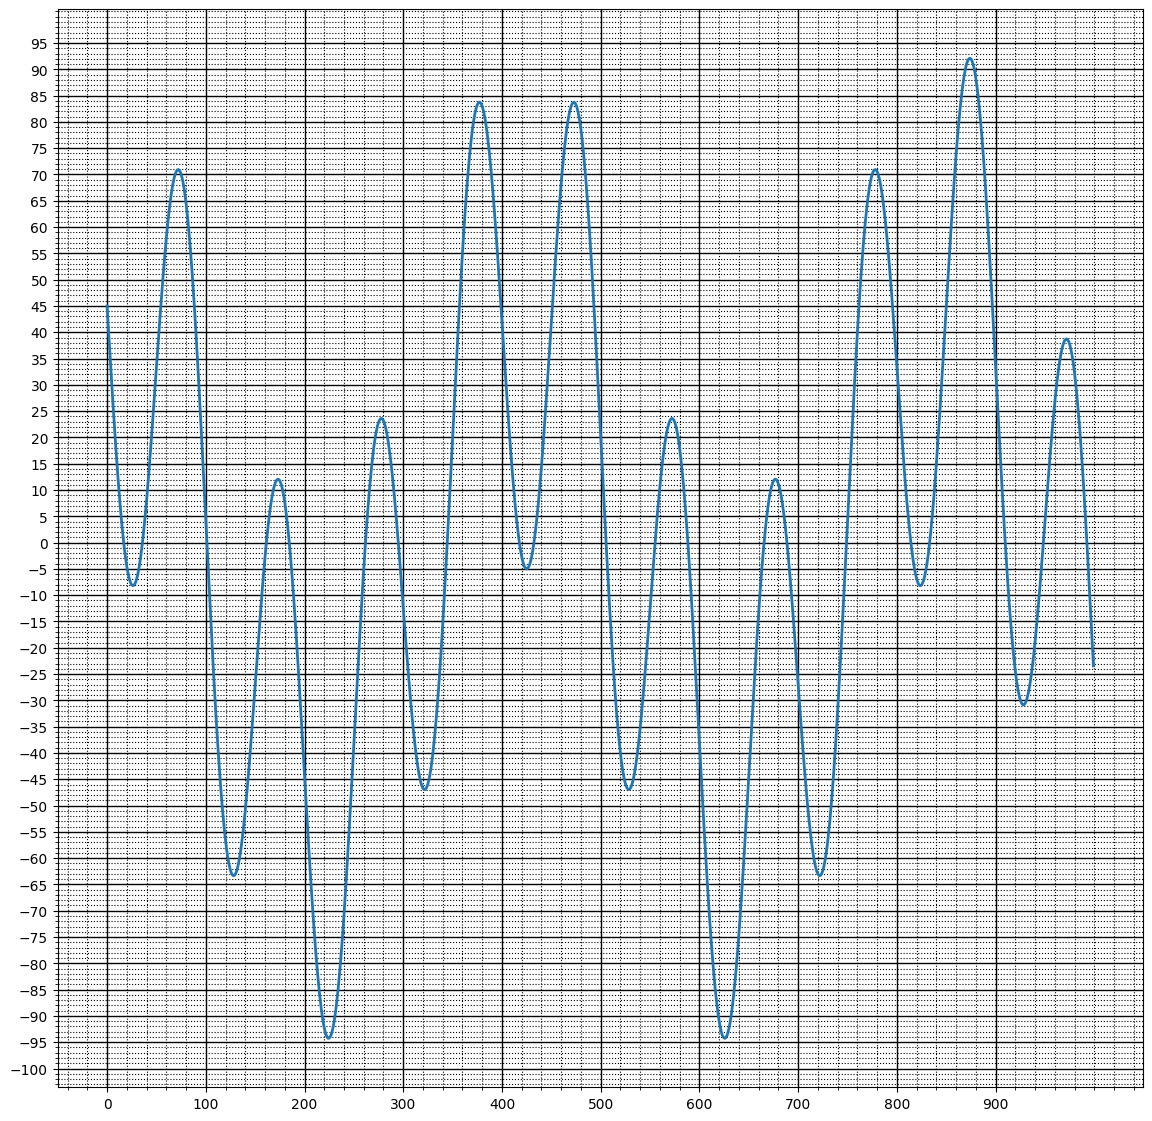

In [58]:
draw_signal(c)

In [59]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [60]:

def convolve(in1, in2):
    l1 = len(in1)
    l2 = len(in2)
    result_length = l1 + l2 - 1
    result = np.zeros(result_length)
    for i in range(result_length):
        for j in range(l2):
            if 0 <= i - j < l1:
                result[i] += in1[i - j] * in2[j]
    return result

In [61]:
import scipy
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [62]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [63]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

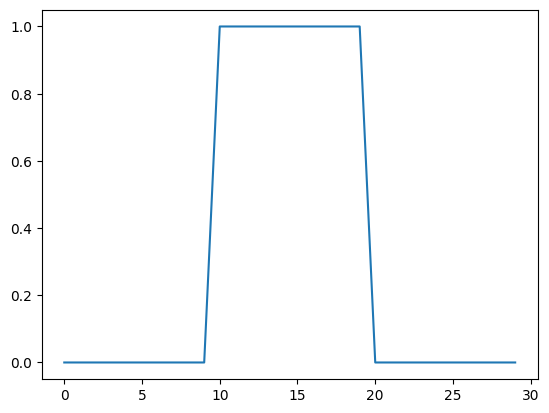

In [64]:
# YOUR CODE HERE
sa = plt.plot(a)


Сигнал **b**

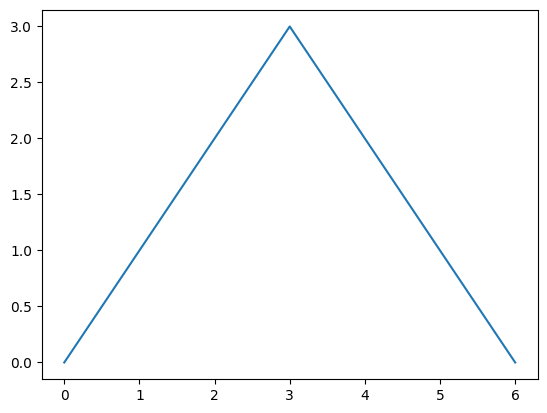

In [29]:
# YOUR CODE HERE
sb = plt.plot(b)

Свертка **a** и **b**

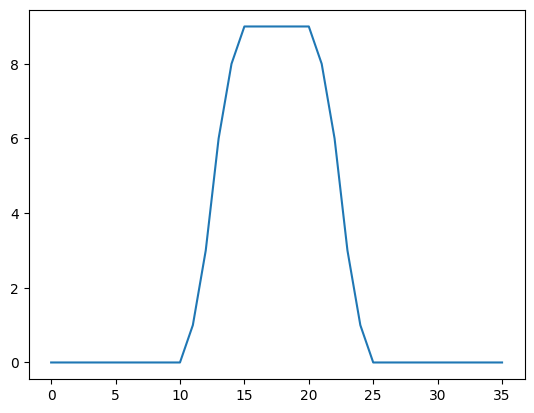

In [32]:
# YOUR CODE HERE
result = convolve(a, b)

# Построение графика
sr = plt.plot(result)

Все 3 графика на одной картинке:

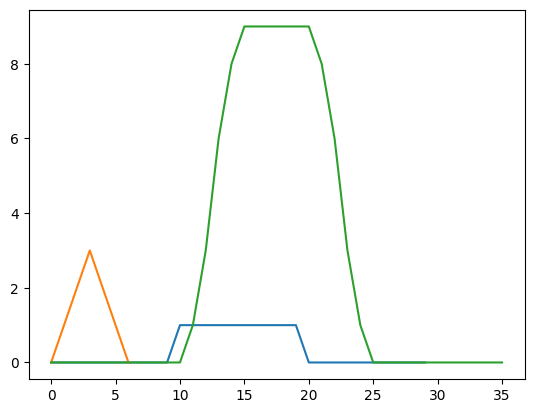

In [33]:
# YOUR CODE HERE
sa = plt.plot(a)
sb = plt.plot(b)
sr = plt.plot(result)

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE